In [2]:
from neurodynex3.tools import input_factory, plot_tools, spike_tools
from helpers import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# defining global constants
E_L = -70 * b2.mV # resting membrane potential
# defining constants for soma
TAU_s = 16 * b2.ms # somatic membrane time scale
TAU_w_s = 100 * b2.ms # somatic adaptation time scale
C_s = 370 * b2.pF # somatic membrane capacitance
E_th = -50 * b2.mV # spike threshold
b_w_s = -200 * b2.pA # used to update w after spike event
T_ref = 3*b2.ms # refractory period

# defining dendritic constants
TAU_d = 8 * b2.ms # dendritic membrane time scale
TAU_w_d = 30 * b2.ms # dendritic adaptation time scale
C_d = 170 * b2.pF # dendritic membrane capacitance
E_d = -38 * b2.mV
D_d = 6 * b2.mV
a_w_d = -13 * b2.nS
g_d = 1200 * b2.pA
g_s = 1300 * b2.pA
c_d = 2600 * b2.pA

# Defining noise constants
mu_s = 70 * b2.pA
mu_d = -270 * b2.pA
TAU_ou = 2 * b2.ms
sigma_ou = 450 * b2.pA

## Dephasing

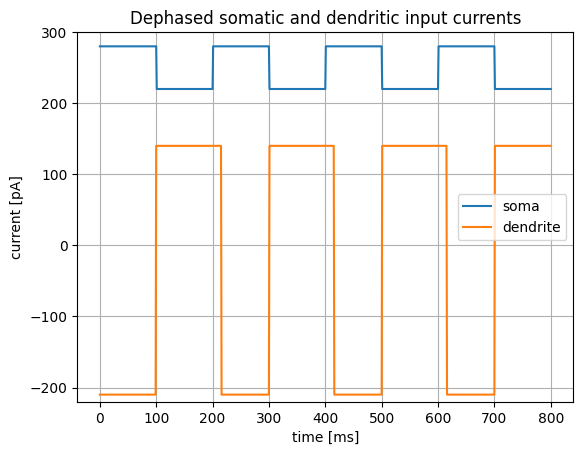

In [12]:
current_alt_dendrite_dephased = get_alternating_current(t_start=0, t_end=800, unit_time=b2.ms, low_current=-210*b2.pA, high_current=140*b2.pA, t_down=85, t_up=115, phase_lag=100)
current_alt_soma_dephased = get_alternating_current(t_start=0, t_end=800, unit_time=b2.ms, high_current=280*b2.pA, low_current=220*b2.pA, t_down=100, t_up=100)
plot_alternating_currents(current1=current_alt_soma_dephased, current2=current_alt_dendrite_dephased, label1="soma", label2="dendrite", title= "Dephased somatic and dendritic input currents", savefig=True)

In [13]:
state_monitor_dephased, spike_monitor_dephased = simulate_pyramidal_neuron_noisy(tau_s = TAU_s, tau_d = TAU_d, tau_ou = TAU_ou, mu_s = mu_s, mu_d = mu_d,
                                                sigma_ou = sigma_ou, C_s = C_s, C_d = C_d, v_rest = E_L, b= b_w_s, v_spike = E_th, tau_w_s = TAU_w_s, tau_w_d = TAU_w_d, I_s_ext = current_alt_soma_dephased, I_d_ext = current_alt_dendrite_dephased, a = a_w_d, E_d = E_d, D_d = D_d, g_d = g_d, g_s = g_s, c_d = c_d,T_refractory = T_ref, nb_neurons = 4000, simulation_time=800*b2.ms)

INFO       No numerical integration method specified for group 'neurongroup_2', using method 'euler' (took 0.02s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]


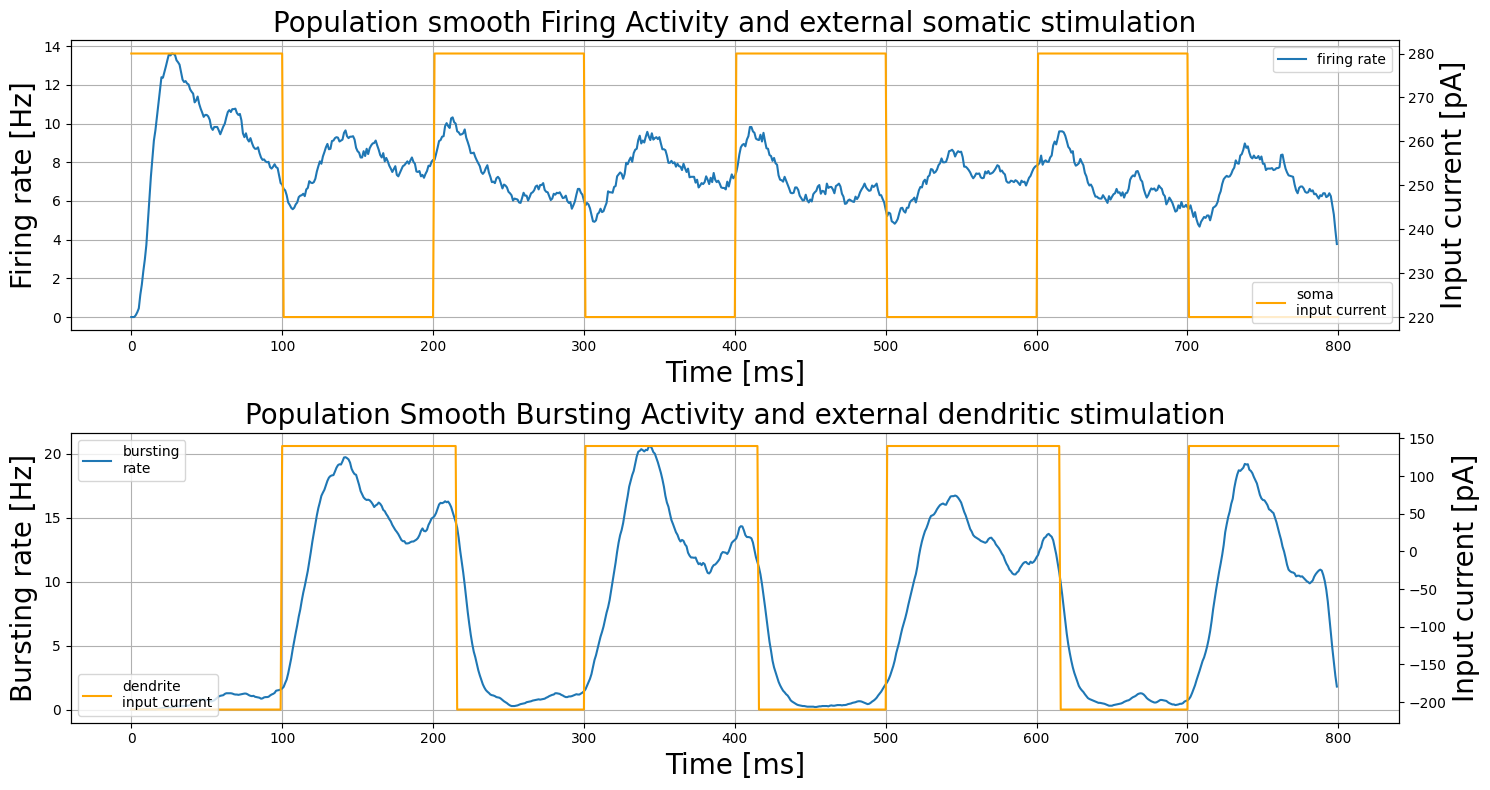

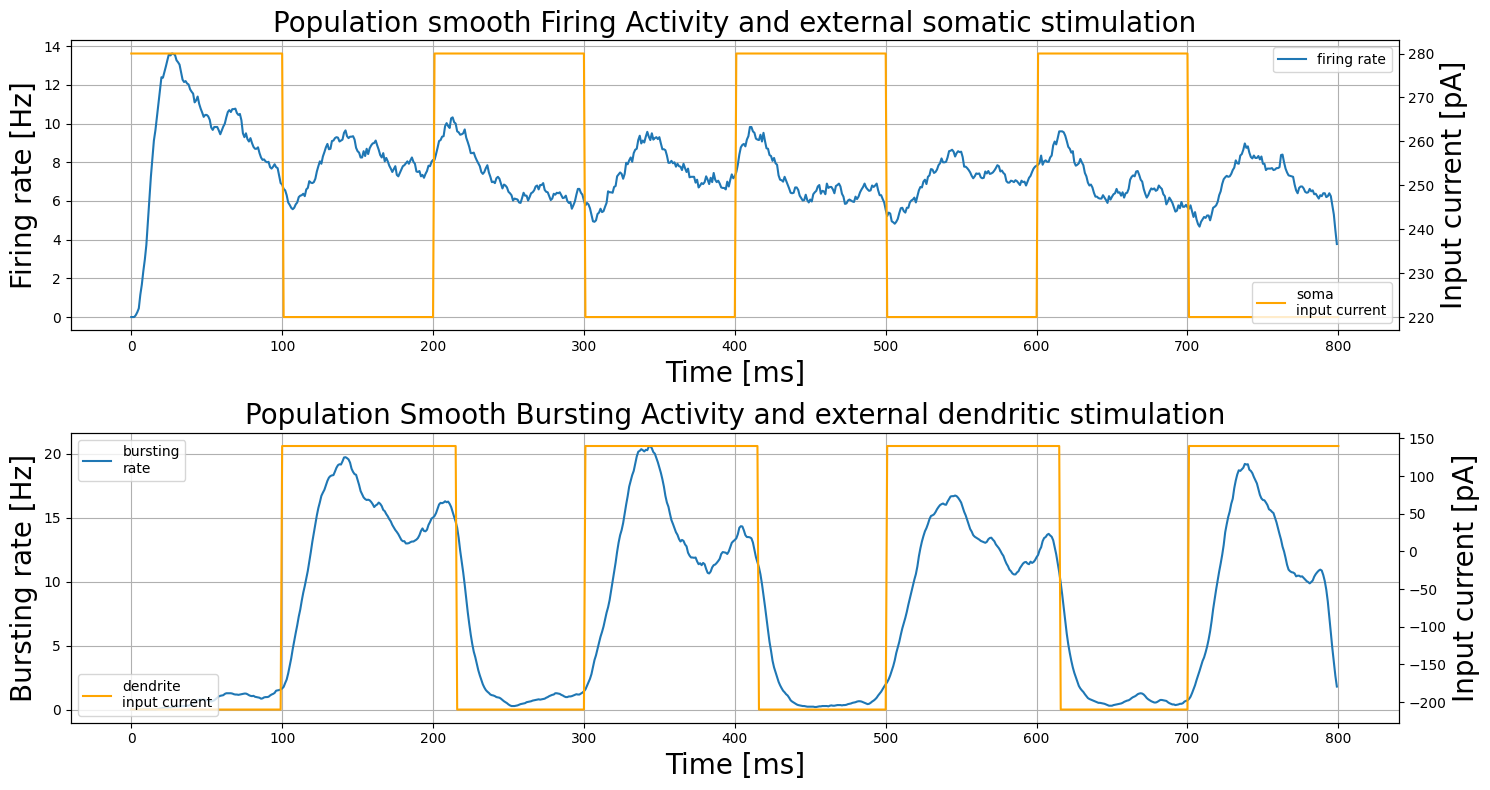

In [15]:
firing_rate_dephased, bursting_rate_dephased = compute_firing_and_burst_rate(spike_monitor_dephased)
plot_external_inputs_and_rates(firing_rate_dephased, bursting_rate_dephased, current_alt_soma_dephased, current_alt_dendrite_dephased, title= 'dephased_current_plot1', savefig=False)

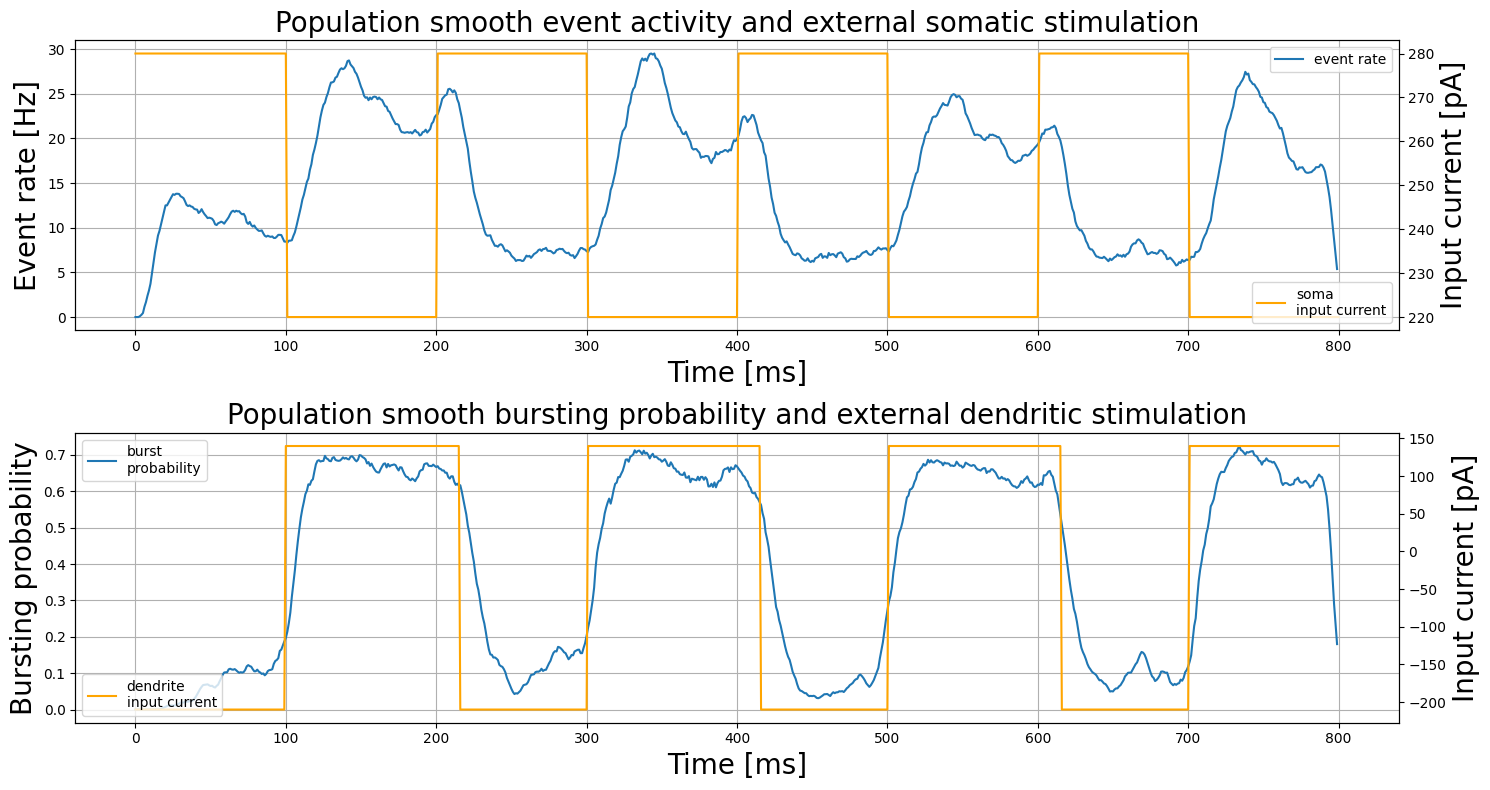

In [16]:
event_rate_dephased = compute_event_rate(spike_monitor_dephased, bursting_rate_dephased)
burst_proba_dephased = compute_burst_proba(bursting_rate_dephased, event_rate_dephased)
plot_external_inputs_and_rates(event_rate_dephased, burst_proba_dephased, current_alt_soma_dephased, current_alt_dendrite_dephased, title= 'dephased_currents_plot2', isBurstProba=True, savefig=False)

## Lower soma current

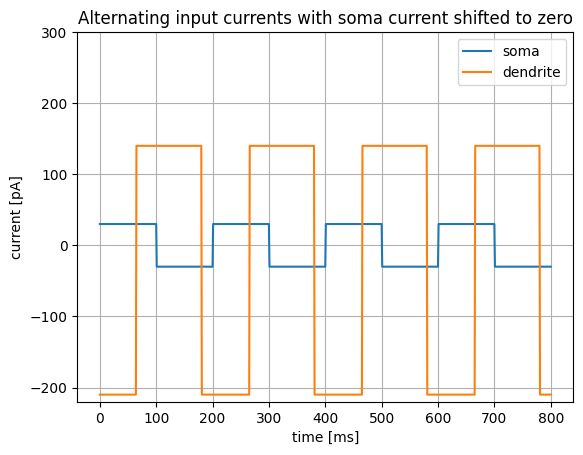

In [21]:
current_alt_dendrite = get_alternating_current(t_start=0, t_end=800, unit_time=b2.ms, low_current=-210*b2.pA, high_current=140*b2.pA, t_down=85, t_up=115, phase_lag=65)
current_alt_soma_down = get_alternating_current(t_start=0, t_end=800, unit_time=b2.ms, high_current=30*b2.pA, low_current=-30*b2.pA, t_down=100, t_up=100)
plot_alternating_currents(current1=current_alt_soma_down, current2=current_alt_dendrite, label1="soma", label2="dendrite", title= "Alternating input currents with soma current shifted to zero", savefig=False)

In [22]:
state_monitor_soma_down, spike_monitor_soma_down = simulate_pyramidal_neuron_noisy(tau_s = TAU_s, tau_d = TAU_d, tau_ou = TAU_ou, mu_s = mu_s, mu_d = mu_d, sigma_ou = sigma_ou, C_s = C_s, C_d = C_d, v_rest = E_L, b= b_w_s, v_spike = E_th, tau_w_s = TAU_w_s, tau_w_d = TAU_w_d, I_s_ext = current_alt_soma_down, I_d_ext = current_alt_dendrite, a = a_w_d, E_d = E_d, D_d = D_d, g_d = g_d, g_s = g_s, c_d = c_d,T_refractory = T_ref, nb_neurons = 4000, simulation_time=800*b2.ms)

INFO       No numerical integration method specified for group 'neurongroup_1', using method 'euler' (took 0.02s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]


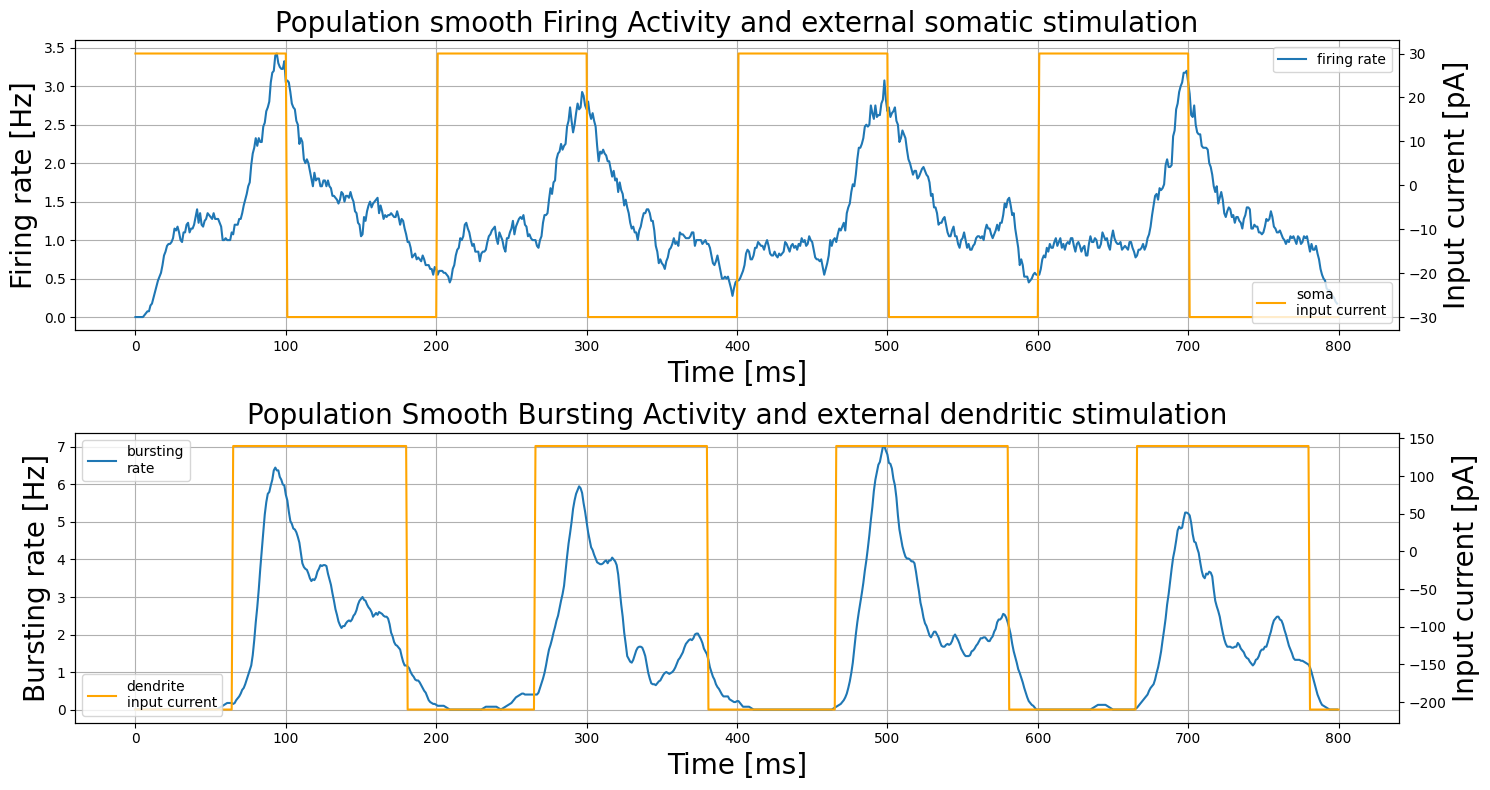

In [23]:
firing_rate_soma_down, bursting_rate_soma_down = compute_firing_and_burst_rate(spike_monitor_soma_down)
plot_external_inputs_and_rates(firing_rate_soma_down, bursting_rate_soma_down, current_alt_soma_down
                               , current_alt_dendrite, title= 'dephased_current_plot1', savefig=False)

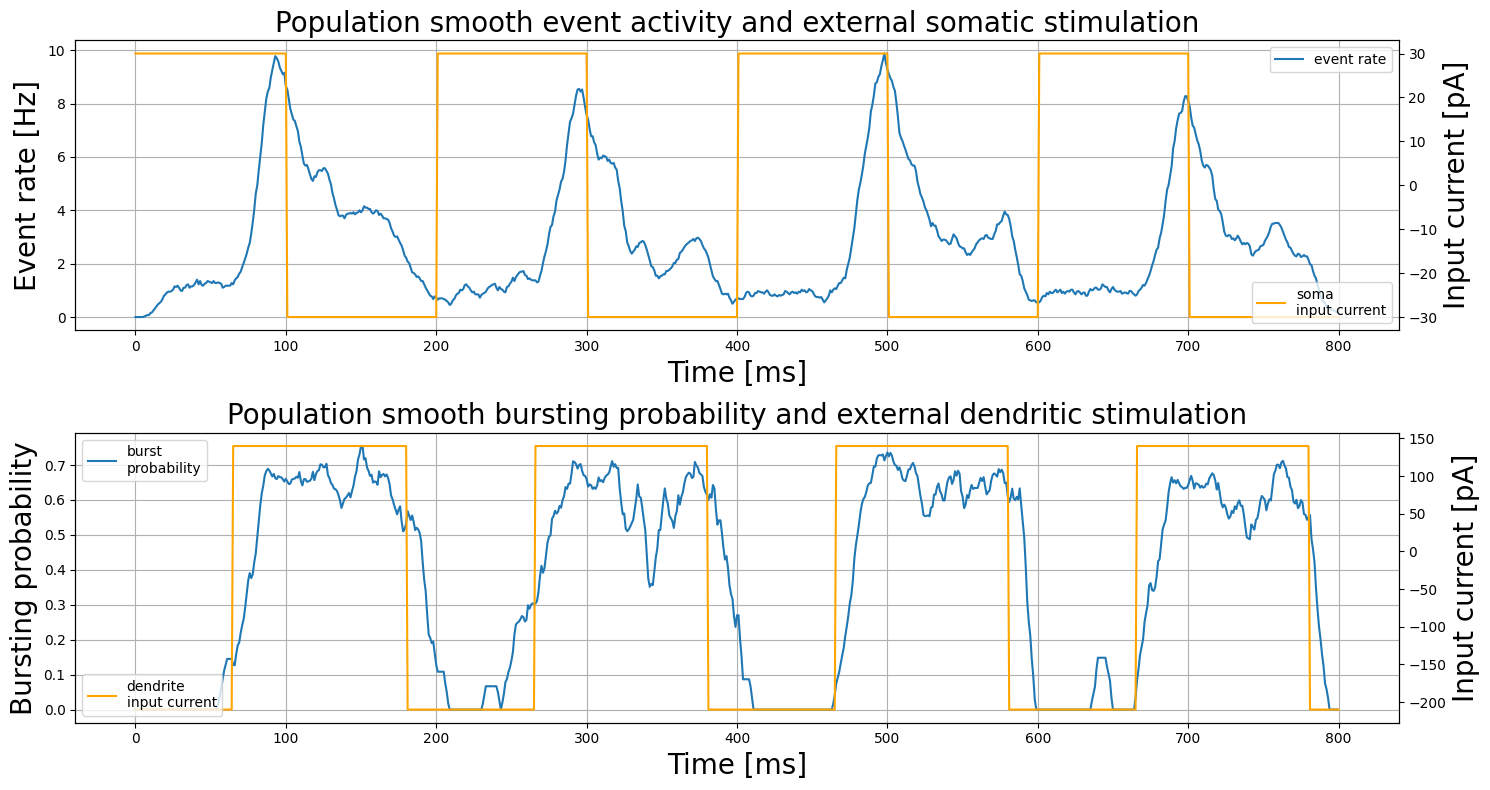

In [24]:
event_rate_soma_down = compute_event_rate(spike_monitor_soma_down, bursting_rate_soma_down)
burst_proba_soma_down = compute_burst_proba(bursting_rate_soma_down, event_rate_soma_down)
plot_external_inputs_and_rates(event_rate_soma_down, burst_proba_soma_down, current_alt_soma_down, current_alt_dendrite, title= 'dephased_currents_plot2', isBurstProba=True, savefig=False)